<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/02_%EA%B5%AC%EA%B0%84%EB%B6%84%ED%95%A0%EA%B3%BC_%EC%9D%B4%EC%82%B0%ED%99%94%2C_%EC%83%81%ED%98%B8%EC%9E%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.5 MB/s eta 0:00:00


# 구간 분할
- 데이터에 구간(bin)을 만들어서 **구간 별 예측** 수행
- 원본 데이터에 구간 정보를 부여한다.

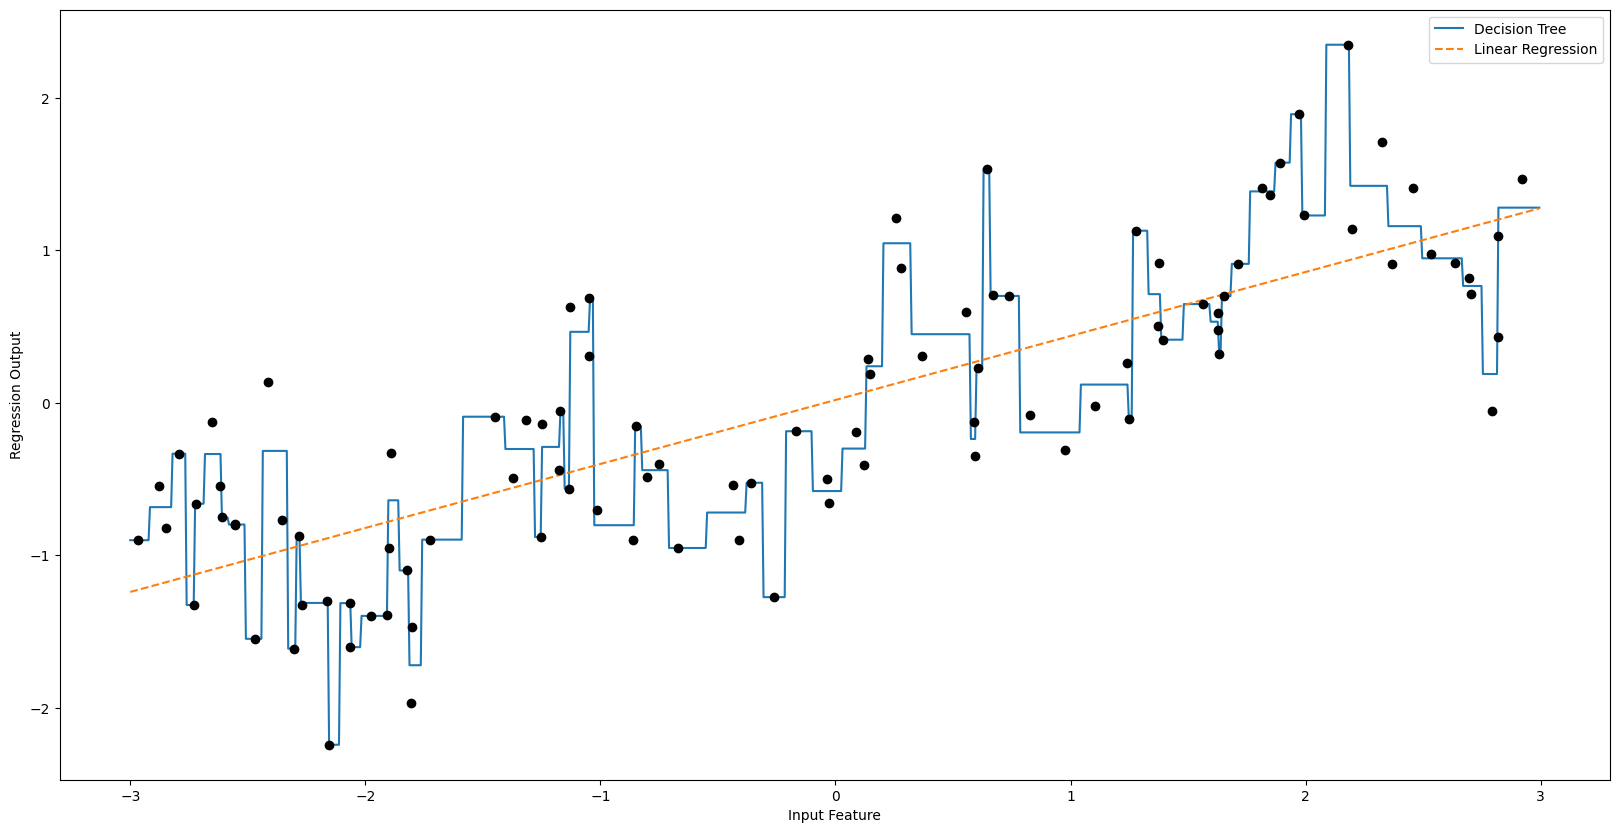

In [ ]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.rcParams['figure.figsize']=(20, 10)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y) # 선형회귀 모델 사용
plt.plot(line, reg.predict(line), '--' , label="Linear Regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()

## 구간 별 예측을 수행하기 위해 구간 정보 생성
- 구간 : 연속형 데이터에서 어떤 한 부분, 구간을 나눠준 것

In [ ]:
bins = np.linspace(-3, 3, 11) # 11개의 숫자를 이용해서 -3부터 3까지 10개의 구간 생성
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [ ]:
# 데이터들을 구간에 집어 넣는 작업이 필요
# 이 데이터 포인트는 여기 구간입니다. -> np.digitize

which_bin = np.digitize(X, bins=bins)
print('데이터 포인트: \n{}'.format(X[:5])) # 각 데이터 포인트(값)들이
print()
print("데이터 포인트의 소속 구간 : \n{}".format(which_bin[:5])) # 어느 구간에 속하는지 확인

데이터 포인트: 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간 : 
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


## 구간 데이터는 정수형태의 데이터지만, 범주형 변수의 성질을 띄고 있음!
- OneHotEncoding을 해 준다.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder  = OneHotEncoder(sparse = False) # sparse=False로 놓으면 희소행렬을 만들지 않음.

X_binned = encoder.fit_transform(which_bin)
X_binned[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
X_binned.shape

(100, 10)

In [ ]:
line_binned = encoder.transform(np.digitize(line, bins=bin))

**❗그래프해석**
- 그래프에서의 수평선은 해당 영역의 데이터들 사이에서 평균을 나타내는 직선으로 그려진다.
- 따라서 각 구간마다의 데이터가 어떤 값인지의 여부에 상관 없이 평균적인 값만을 그리게 된다.

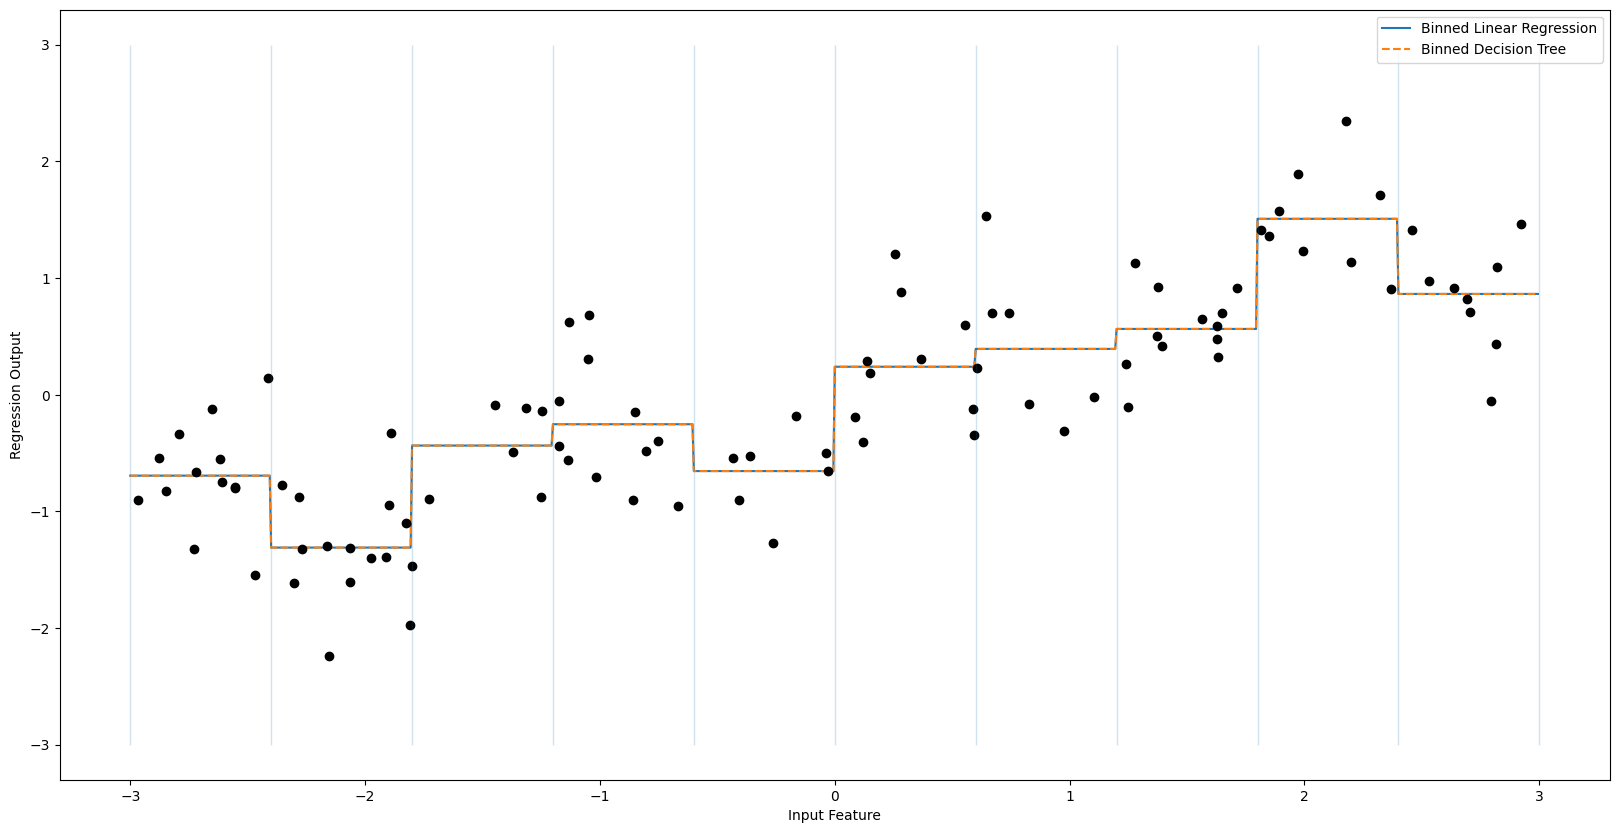

In [ ]:
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Binned Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='Binned Decision Tree')
plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.show()

# 상호작용 (interaction)
- 데이터 끼리의 관계를 설정하는 것. (특성과 특성의 곱으로 표현)

In [ ]:
# X의 정보와 구간의 정보를 합치기
X_combined = np.hstack([X, X_binned])
X_combined[:5]

# 따라서 첫번째는 데이터에 대한 정보가, 다른 곳에는 OneHotEncoding한 구간 정보가 합쳐져서 출력된다.

array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

**❗그래프 해석**
- 그래프에서 각 구간마다 기울기가 있는 그래프로 바뀌게 되는데,
- 여기서 각 그래프마다의 기울기가 모두 같다.
- 이 이유는 모든 데이터를 기준으로 하나의 특성으로 두고 기울기를 구한 것이므로, 모든 구간마다 기울기가 같다.

📌 따라서 각 구간마다 기울기가 다른, 즉 각 구간에 맞는 기울기를 예측해서 그래프를 그려야 한다. -> 다음 코드로

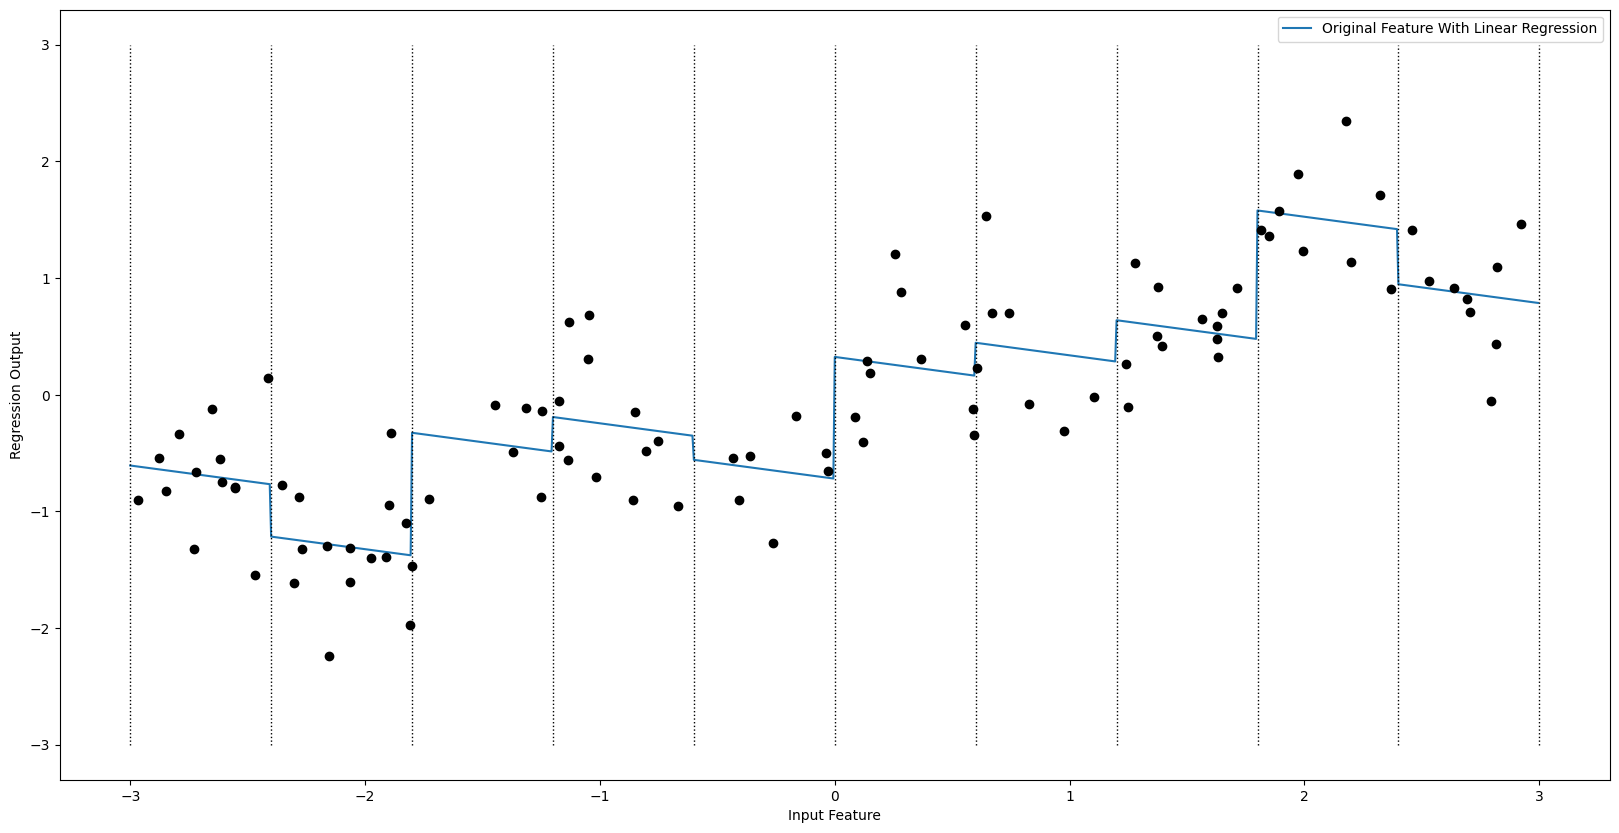

In [ ]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned]) # 예측할 선에 대해서도 One-Hot-Encoding된 데이터를 추가함
plt.plot(line, reg.predict(line_combined), label='Original Feature With Linear Regression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) #x축은 각 구간(bin, bin), y축은 -3 부터 3까지 표현

plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:, 0], y, 'o', c='k')

* X축 특성이 하나이기 때문에 기울기도 하나다.
* 구간 데이터와 더불어 구간 데이터의 X 값이 같이 있으면? - X가 속한 구간 데이터와 실제 그 구간에 속한 X의 값을 동시에 볼 수 있다.

In [ ]:
X_product = np.hstack([X_binned, X * X_binned]) # X: 원본 데이터, X * X_binned: 한 구간에 어떤 데이터가 있는지에 대한 정보

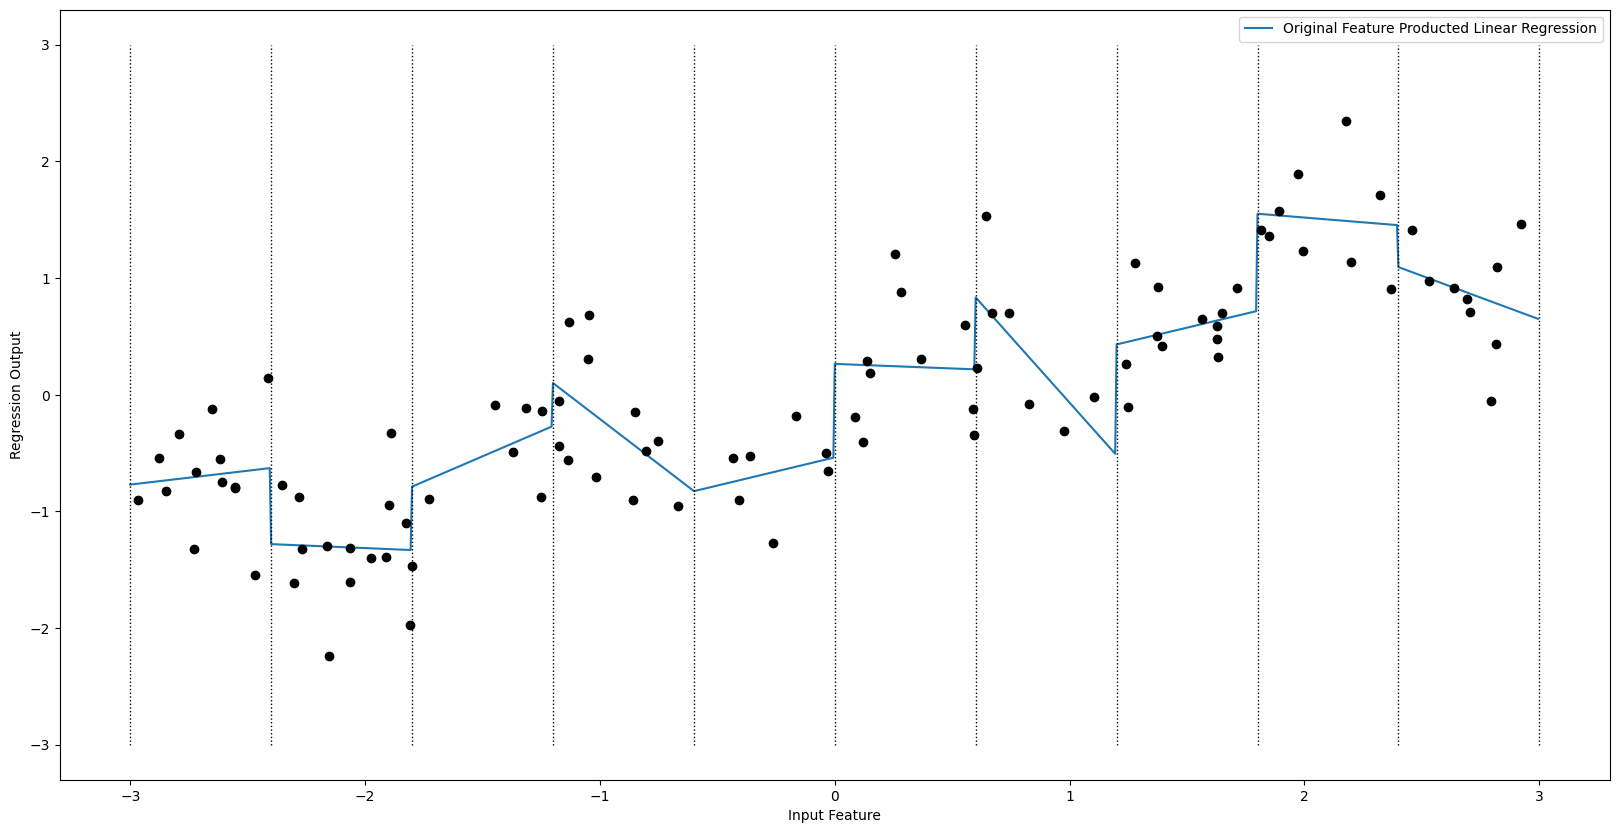

In [ ]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned]) # 예측해야 할 데이터도 훈련한 데이터와 같이 상호작용을 구함
plt.plot(line, reg.predict(line_product), label='Original Feature Producted Linear Regression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()